# Imports

In [2]:
from src.dispersion import * 
from src.VSH import * 
from src.extra_special import * 
from src.fields import (
    E_,
    H_,
    E_cart_,
    H_cart_
)
from src.AM import *
from src.misc import *

import numpy as np
import scipy.constants as const
import scipy.special as sp
from scipy import integrate
from cxroots import Rectangle, AnnulusSector, Circle
import cxroots
from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe  # for text effects 
plt.rcParams.update({'font.size': 18})

Z_0 = np.sqrt(const.mu_0 / const.epsilon_0)  # vacuum impedance

# Search for eigen frequences

## Dielectric

In [11]:
particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1  # m = -n, ..., n

a = 10*const.nano

mode_type = "TM"  # "TE" or "TM"

eps_out = 1
mu_out = 1

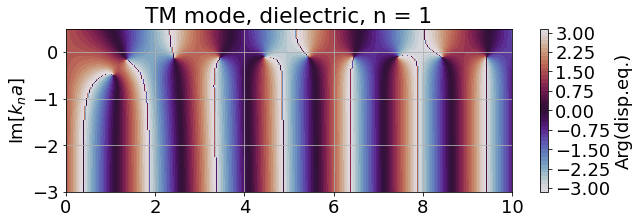

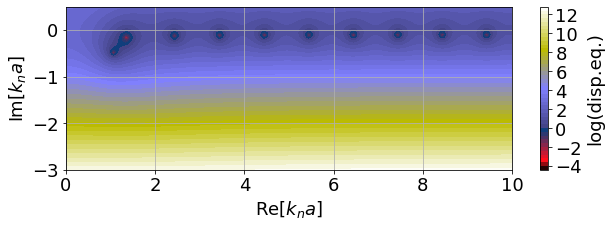

In [12]:
N = 300

z_re = np.linspace(0, 10, num=N)
z_im = np.linspace(-3, 0.5, num=N)

X, Y = np.meshgrid(z_re, z_im, sparse=True)

if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp

weightOrder = n
Z = foo_disp_nodiv(n, X + 1j*Y, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric, weightOrder=weightOrder)

ARG_Z = np.angle(Z)

#potolok = 15
#Z[np.log(np.abs(Z)) > potolok] = np.nan # np.exp(potolok)

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, ARG_Z, levels=50, cmap="twilight")
plt.colorbar(label="Arg(disp.eq.)")
plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
#plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, np.log(np.abs(Z)), levels=50, cmap="gist_stern")
plt.colorbar(label="log(disp.eq.)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

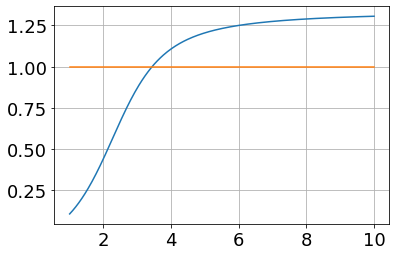

In [41]:
qq = np.linspace(1, stop=10, num=300)

j = 3
m = 1

dq = 1e-6

def den(q):
    zj = spherical_h1(j, q)
    qz_p = ((q+dq)*spherical_h1(j, q+dq) - (q-dq)*spherical_h1(j, q-dq)) / (2*dq)
    
    return 0.25*(np.abs(zj)**2 / np.abs(q)**2 * j*j*(j+1)**2 + 0.5*(j*(j+1) - m**2 + m*(2*j+1)) * (np.abs(1/q * qz_p)**2 + np.abs(zj)**2))


def num(q):
    zj = spherical_h1(j, q)
    return 0.5 * np.real(q) *  j*(j+1) * np.abs(zj)**2 * m * np.real(1/q)

#plt.plot(qq, den(qq), label='w')
#plt.plot(qq, num(qq), label='Jz')
plt.plot(qq, num(qq*(1+0.0j))/den(qq*(1+0.0j)))
plt.plot(qq, m * qq/qq)
#plt.legend()
plt.grid()
plt.show()
